Making a nice SED plot. 20250317 adding a swift plot for Girish's TESS proposal

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel
from scipy.interpolate import interp1d



import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from matplotlib.gridspec import GridSpec


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

Conbine AM's SED with mine, add Solar.

In [4]:
# amdat = Table.read('/media/david/2tb_ext_hd/hddata/meats/misc_data/hd120411/HD120411spec_G2V_0.04.ascii', format='ascii.basic')
# aw, af, ae = amdat['Wavelength(nm)']*10, amdat['Flux(erg/cm^2/s/nm)']/10, amdat['Err']/10
# plt.plot(aw[aw> 2000], af[aw> 2000])

In [5]:
# seds = glob.glob('draft_hlsp/hd120411/*multi*')
# seds

In [6]:
# sed = fits.getdata(seds[2], 1)
# sw, sf, se = sed['WAVELENGTH'], sed['FLUX'], sed['ERROR']

In [7]:
# fig, ax = plt.subplots()

# amask = aw > 5690
# smask = sw < 5690

# ax.plot(aw[amask], af[amask])
# ax.step(sw[smask], sf[smask], where='mid')

# ax.set_yscale('log')
# ax.set_xscale('log')


In [8]:
hdspec = fits.getdata('draft_hlsp/hd120411/hlsp_muscles_multi_multi_hd-120411_broadband_v1_adapt-const-res-sed.fits', 1)
starw, starf = hdspec['WAVELENGTH'], hdspec['FLUX']
sol = Table.read('Solar_1au_sed.ecsv')
sw, sf = sol['WAVELENGTH'], sol['FLUX']

<>:91: SyntaxWarning: invalid escape sequence '\A'
<>:94: SyntaxWarning: invalid escape sequence '\A'
<>:108: SyntaxWarning: invalid escape sequence '\o'
<>:91: SyntaxWarning: invalid escape sequence '\A'
<>:94: SyntaxWarning: invalid escape sequence '\A'
<>:108: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_189334/1980511169.py:91: SyntaxWarning: invalid escape sequence '\A'
  ax.set_ylabel('F$_{EEID}$ (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
/tmp/ipykernel_189334/1980511169.py:94: SyntaxWarning: invalid escape sequence '\A'
  ax1.set_xlabel('Wavelength (\AA)', size=25)
/tmp/ipykernel_189334/1980511169.py:108: SyntaxWarning: invalid escape sequence '\o'
  ax1.set_ylabel('$F_*/F_{\odot}$', size=25)


1.3228177080099348 AU


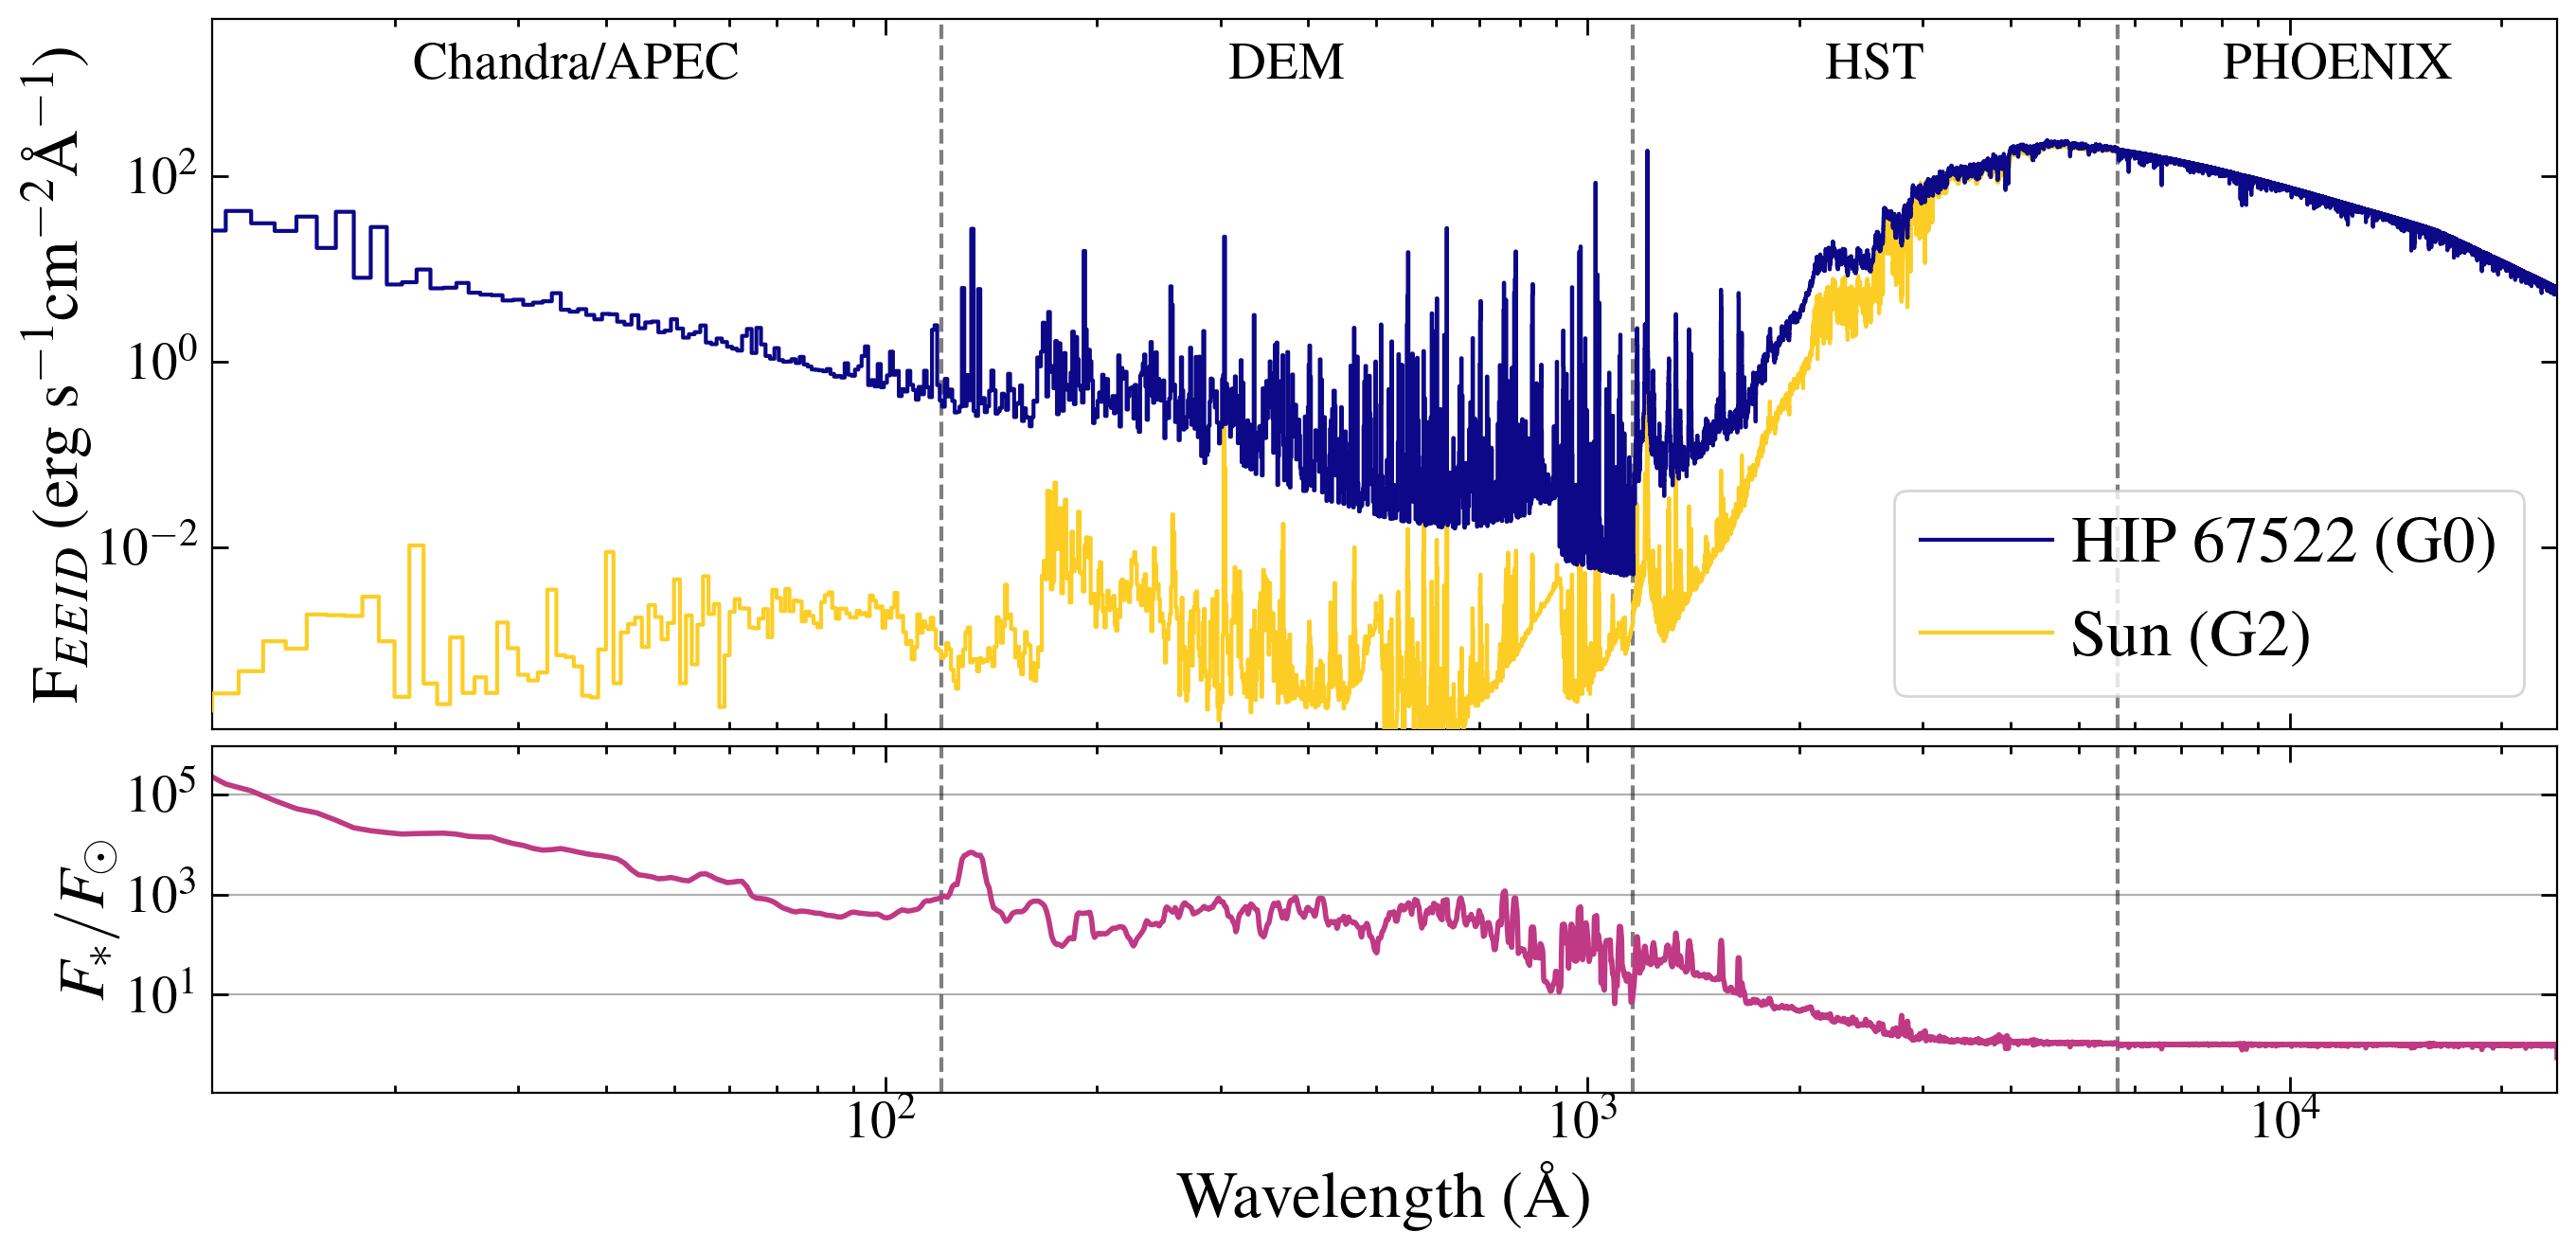

In [22]:
# import mplcyberpunk
# plt.style.use("cyberpunk")

# cols = ['C0', 'C1', 'C2']
cols = [plt.cm.plasma(0),plt.cm.plasma(0.9), plt.cm.plasma(0.45)]

d_star = 124.73*u.pc
t_star = 5675*u.K
r_star = 1.38*u.Rsun
t_sun = 5777*u.K
d_sun = (1*u.au).to(u.pc)

lstar = 10**0.243
# eeidau = 0.471*u.au
eeidau = (lstar**0.5)*1*u.au
print(eeidau)

bb_scale = (u.Rsun**2 * t_sun**4)/(r_star**2 * t_star**4)*(d_star/d_sun)**2
# print(bb_scale)

# fig, ax = plt.subplots(figsize=(14, 7))
fig, axes = plt.subplot_mosaic([[0,0,0],[0,0,0],[1,1,1]],figsize=(14, 7), sharex=True)


ax= axes[0]
ax.step(starw, starf*bb_scale, c=cols[0], label = 'HIP 67522 (G0)', zorder=12, where='mid')
ax.step(sw, sf, c=cols[1], label = 'Sun (G2)', zorder=10, where='mid')
# ax.set_xlim(11, sw[-1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1.1e-4, 4.9e3)

# plt.axvline(900, ls='--')
# plt.axvline(4000, ls='--')


# plt.fill_between([0,900],0,10000, facecolor='b',alpha =0.3)
#plt.annotate('Thermosphere heating/removal', (12, 1e-12))

# plt.fill_between([900,4000],0,10000, facecolor='g', alpha =0.3)

# plt.fill_between([2000,4000],0,10000, facecolor='#ffff99',alpha =0.5)
#plt.annotate(' Photochemistry', (900, 1e-13))
# 
# plt.fill_between([4000,60000],0,10000, facecolor='r',alpha =0.3)
#plt.annotate('Atmosphere \& surface heating', (4100, 1e-12))

 
bar_y = 1e3
label_y = bar_y*1.5
e_y = bar_y *0.3

xlims = (11, sw[-1])
ax.set_xlim(xlims[0], xlims[1])
divlines = (120, 1160, 5690)
[ax.axvline(line, ls='--', c='k', alpha=0.5) for line in divlines]

labels = ['Chandra/APEC', 'DEM', 'HST', 'PHOENIX']
labpos = np.sort(np.hstack((xlims, divlines)))

for i, label in enumerate(labels):
    label_x = (labpos[i]*labpos[i+1])**0.5
    ax.annotate(label, (label_x, label_y), ha='center', va='center')


# plt.errorbar((5,50),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('XMM', (10, label_y))

# plt.errorbar((50,100),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('APEC', (75, label_y), ha='center')

# plt.errorbar((100,1060),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('EUV Model', (350, label_y), ha='center')

# plt.errorbar((1068, 5692),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('HST', (1900, label_y))

# plt.errorbar((5692, 25000),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('PHOENIX', (8000, label_y))
# plt.annotate('X-ray/EUV' ,(120, label_y), size=25)
# plt.annotate('Ultraviolet' ,(1300, label_y), size=25)
# plt.annotate('Optical/IR' ,(6000, label_y), size=25)

ax.legend(fontsize=25, loc=4,frameon=True)

# mplcyberpunk.add_glow_effects()
# mplcyberpunk.make_lines_glow()
# mplcyberpunk.add_underglow()

# ax.set_xlabel('Wavelength (\AA)', size=25)
ax.set_ylabel('F$_{EEID}$ (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)

ax1 = axes[1]
ax1.set_xlabel('Wavelength (\AA)', size=25)
[ax1.axvline(line, ls='--', c='k', alpha=0.5) for line in divlines]


mask = (starw> sw[0]) & (starw < sw[-1])
fnew = interp1d(starw[mask], starf[mask], fill_value='extrapolate')(sw)
fnew = fnew*bb_scale.value
ratio = fnew/sf
ratio = convolve(ratio,Box1DKernel(10))
ax1.plot(sw, ratio, c=cols[2], lw=2)
# ax1.set_ylim(0, 1000)

ax1.set_yscale('log')
ax1.set_ylim(0.11, 9e5)
ax1.set_ylabel('$F_*/F_{\odot}$', size=25)
# ax1.axhline(1, ls='--', c='k', alpha=0.5)

ax1.grid(axis='y')
fig.tight_layout()
fig.subplots_adjust(hspace=0.05)

# plt.savefig('plots/just_sun_cp.png', dpi=150)
# plt.savefig('plots/hip67522_sun_cp.png', dpi=150)
# plt.savefig('plots/hd120411_v_sun.pdf')

In [10]:
swiftlc = Table.read('/media/david/2tb_ext_hd/hddata/meats/swift/hd120411/lightcurve/USERPROD_207520/lc/curve.qdp')
swiftlc

col1,col1_perr,col1_nerr,col2,col2_perr,col2_nerr
float64,float64,float64,float64,float64,float64
110.964,50.0,-50.0,0.03568074,0.02739771,-0.01845204
210.964,50.0,-50.0,0.08647995,0.0390538,-0.03024351
310.964,50.0,-50.0,0.06144147,0.03378896,-0.02495659
410.964,50.0,-50.0,0.08720833,0.03895203,-0.0301875
26061810.964,50.0,-50.0,0.1187724,0.04805992,-0.037879
26061910.964,50.0,-50.0,0.04882895,0.03124066,-0.02222568
26062010.964,50.0,-50.0,0.06394181,0.03439502,-0.02540423
26062110.964,50.0,-50.0,0.06441234,0.03418009,-0.02524548
26062210.964,50.0,-50.0,0.06359489,0.03439822,-0.02540659


In [11]:
stime = swiftlc['col1']
scounts = swiftlc['col2']
scounts_e = [swiftlc['col2_perr'], abs(swiftlc['col2_nerr'])]

<>:39: SyntaxWarning: invalid escape sequence '\,'
<>:39: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_189334/3796581799.py:39: SyntaxWarning: invalid escape sequence '\,'
  axes[i].annotate('Obs\,{}'.format(i+1), (0.95, 0.95), xycoords='axes fraction', ha='right', va='top')


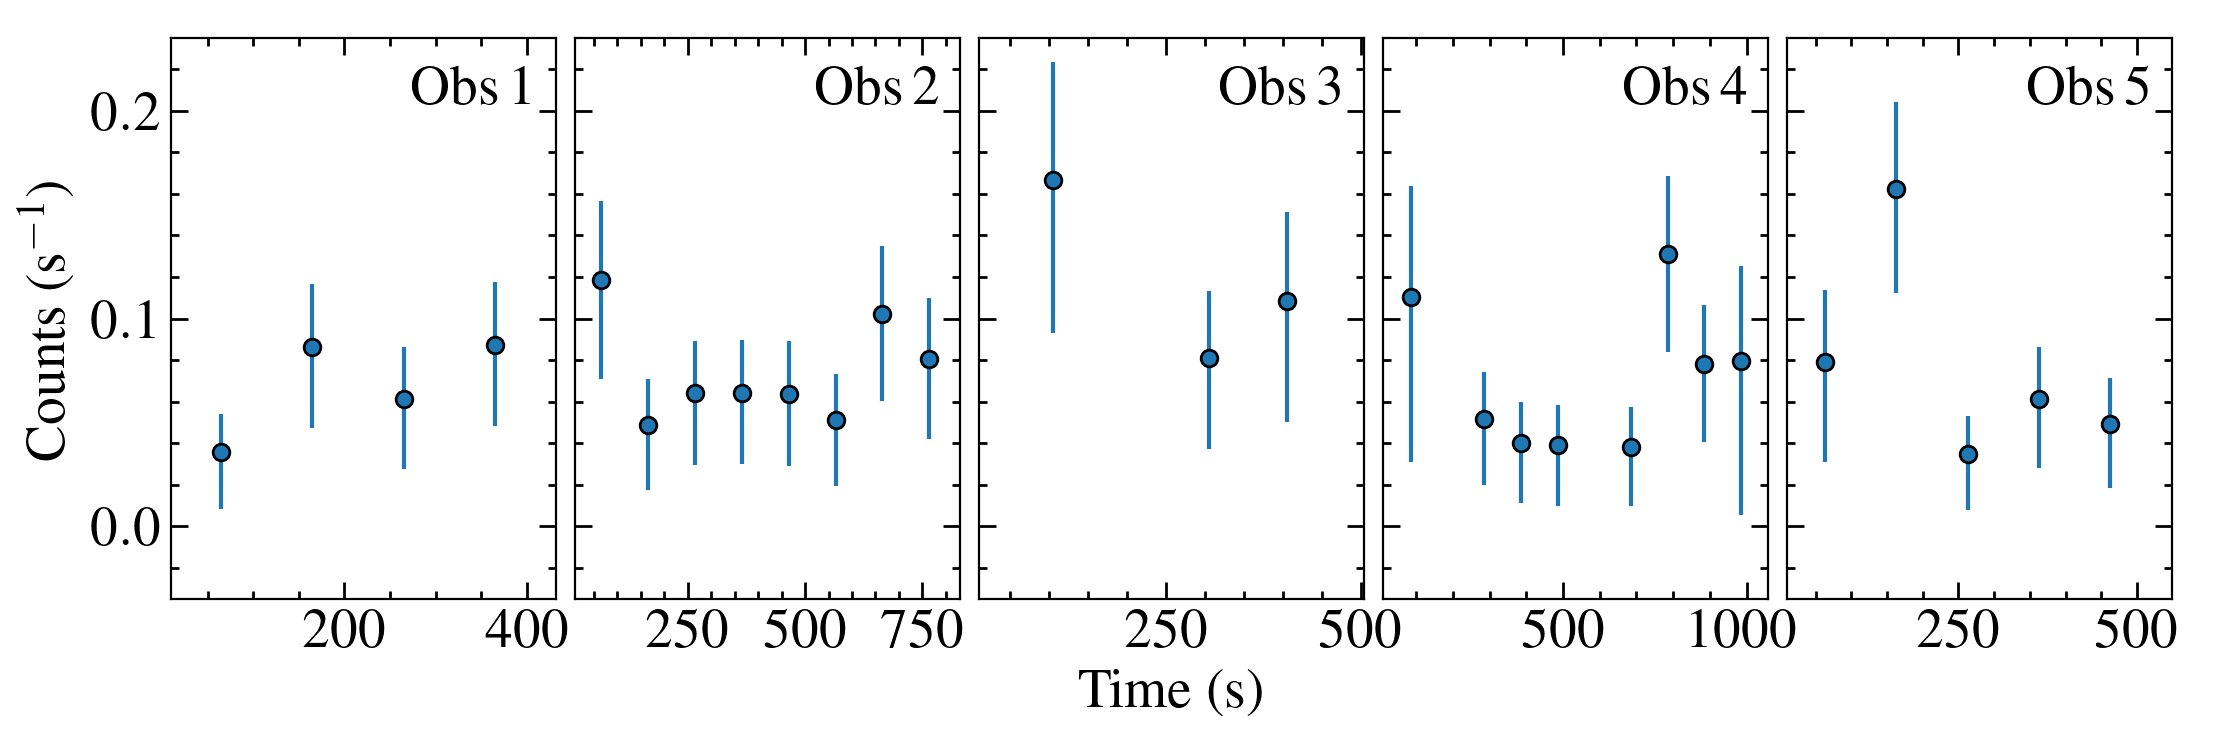

In [12]:
# fig, axes = plt.subplots()

# ax.errorbar(stime, scounts, yerr=scounts_e, ls='none')


obs_times_s= [[100, 424],[26061800, 26062522],[30771760,30772156],[30898480, 30899430],[30920902, 30921343]]
stimed = ((stime*u.s).to(u.d).value)
obs_times_d = ((obs_times_s*u.s).to(u.d).value)



#!/usr/bin/env python

"""
Makes a plot with gaps in the x axes split up with diagonal lines
"""

fig, axes = plt.subplots(ncols=5, sharey = True, figsize=(12, 4)) #making a plot with three subplots that we'll combine
# fig, axes = plt.subplot_mosaic([[0, 1, 1]], sharey =True) #use this one for more complicated subplots; in this case a plot where the first planel is half the width of the second  

axes[0].set_ylim(-0.035, 0.235,) # should only need to set the ylims on the first subplot because sharey = True
# axes[0].set_xlim(2.1, 11.9) #setting up the ranges that the plots will cover. One row per subplot
# axes[1].set_xlim(34.1, 54.9)
# axes[2].set_xlim(76.1, 92.9)


#setting up the slanted lines

for i in range(len(axes)):

    t0 = obs_times_s[i][0]-54
    
    axes[i].errorbar(stime-t0, scounts, yerr=scounts_e, ls='none', marker='o', markeredgecolor='k') #add the points to each plot

    # axes[i].set_xlim(obs_times_s[i][0]-t0, obs_times_s[i][1]-t0)
    axes[i].set_xlim(10, obs_times_s[i][1]-t0+54)
    
  
    axes[i].annotate('Obs\,{}'.format(i+1), (0.95, 0.95), xycoords='axes fraction', ha='right', va='top')

    
#add a frame that goes around all the subplots to add the labels       
bigax = fig.add_subplot(111, frame_on=False)
bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
bigax.set_ylabel('Counts (s$^{-1}$)', labelpad=5) #change labelpad if the label is overlapping the tick labels
bigax.set_xlabel('Time (s)')
# bigax.set_title('Example plot with split x axis', pad =15) 

fig.tight_layout()
fig.subplots_adjust(wspace=0.05, bottom=0.2) #change the gap in between the subplots

fig.savefig('plots/hd120411_xrt_lc.pdf') # use to save the figure.
plt.show()





Spectrum

<>:26: SyntaxWarning: invalid escape sequence '\A'
<>:27: SyntaxWarning: invalid escape sequence '\A'
<>:26: SyntaxWarning: invalid escape sequence '\A'
<>:27: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipykernel_189334/3699760262.py:26: SyntaxWarning: invalid escape sequence '\A'
  ax.set_ylabel('Flux (10$^{-13}$ erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)')
/tmp/ipykernel_189334/3699760262.py:27: SyntaxWarning: invalid escape sequence '\A'
  ax.set_xlabel('Wavelength (\AA)')


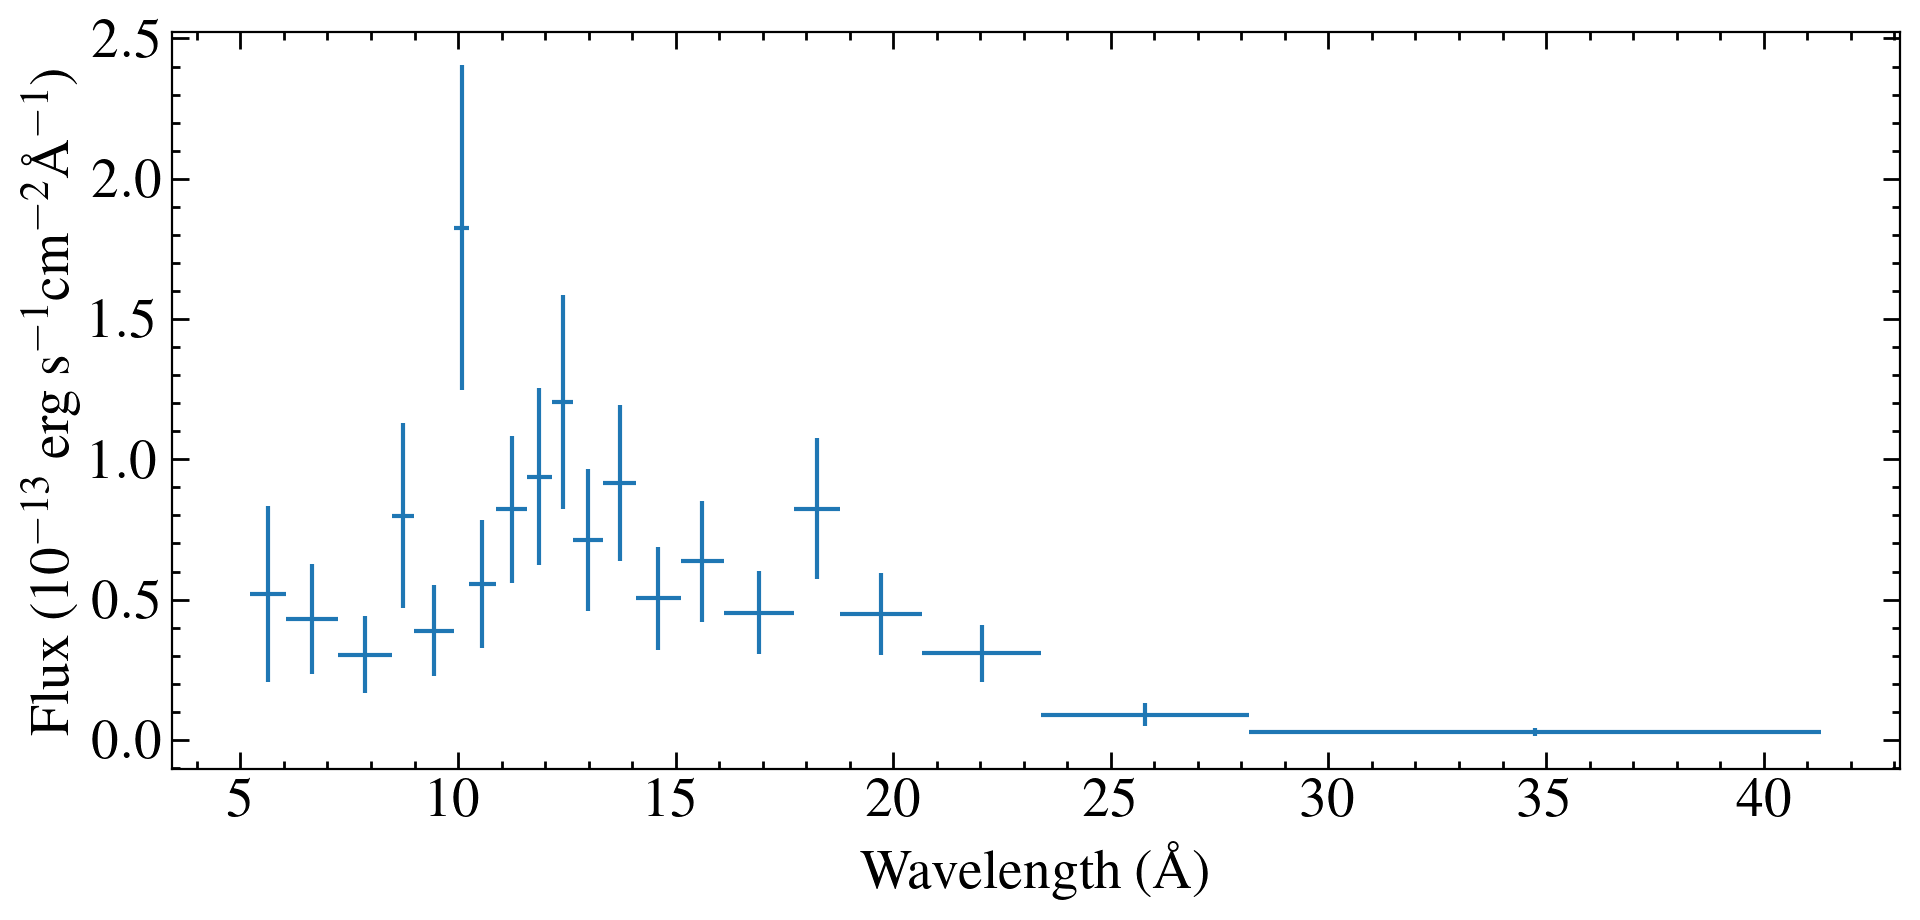

In [13]:
def apec_to_spec(path):
    """
    Converts an xspec plot model wdata textfile from counts to ergs. 
    Assumes that the wavelength array is in Angstrom and the flux arrays are in counts/s/cm2/A
    """
    xrt = np.loadtxt(path, skiprows=3)
    xrt = xrt[::-1]
    wx = xrt[:,0]*u.AA
    bins = xrt[:, 1]*u.AA
    fx  = (xrt[:,2] * (u.photon/u.s/u.cm**2/u.AA)).to(u.erg/u.s/u.cm**2/u.AA, equivalencies=u.spectral_density(wx))
    ex  = (xrt[:,3] * (u.photon/u.s/u.cm**2/u.AA)).to(u.erg/u.s/u.cm**2/u.AA, equivalencies=u.spectral_density(wx))
    model  = (xrt[:,4] * (u.photon/u.s/u.cm**2/u.AA)).to(u.erg/u.s/u.cm**2/u.AA, equivalencies=u.spectral_density(wx))
    return wx, bins, fx, ex, model

xpath = '/media/david/2tb_ext_hd/hddata/meats/swift/hd120411/spectrum/hd120411_xrt_fit.txt'
wx, bins, fx, ex, model = apec_to_spec(xpath)

# plt.step(wxi, model, where='mid')
# plt.scatter(wxi, fxi)

fig, ax = plt.subplots(figsize=(10, 5))
scale = 1e13
ax.errorbar(wx, fx*scale, xerr=bins, yerr=ex*scale, ls='none')
# ax.step(wx, model*scale, where='mid')

ax.set_ylabel('Flux (10$^{-13}$ erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)')
ax.set_xlabel('Wavelength (\AA)')
fig.tight_layout()

fig.savefig('plots/hd120411_xrt_spec.pdf')


Is the H alpha emmsion consistant with emmsion from a double peaked disc at the orbit of planet b?

In [14]:
a = 0.0748 *u.au
mstar = 1.22*u.Msun

vp = ((const.G*mstar.to(u.kg))/a.to(u.m))**0.5
print(vp)

120287.97877215511 m / s


<>:22: SyntaxWarning: invalid escape sequence '\,'
<>:24: SyntaxWarning: invalid escape sequence '\A'
<>:22: SyntaxWarning: invalid escape sequence '\,'
<>:24: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipykernel_189334/3165080741.py:22: SyntaxWarning: invalid escape sequence '\,'
  ax.set_xlabel('Radial Velocity (km\,s$^{-1}$)')
/tmp/ipykernel_189334/3165080741.py:24: SyntaxWarning: invalid escape sequence '\A'
  ax.set_ylabel('Flux (10$^{-13}$ erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)')


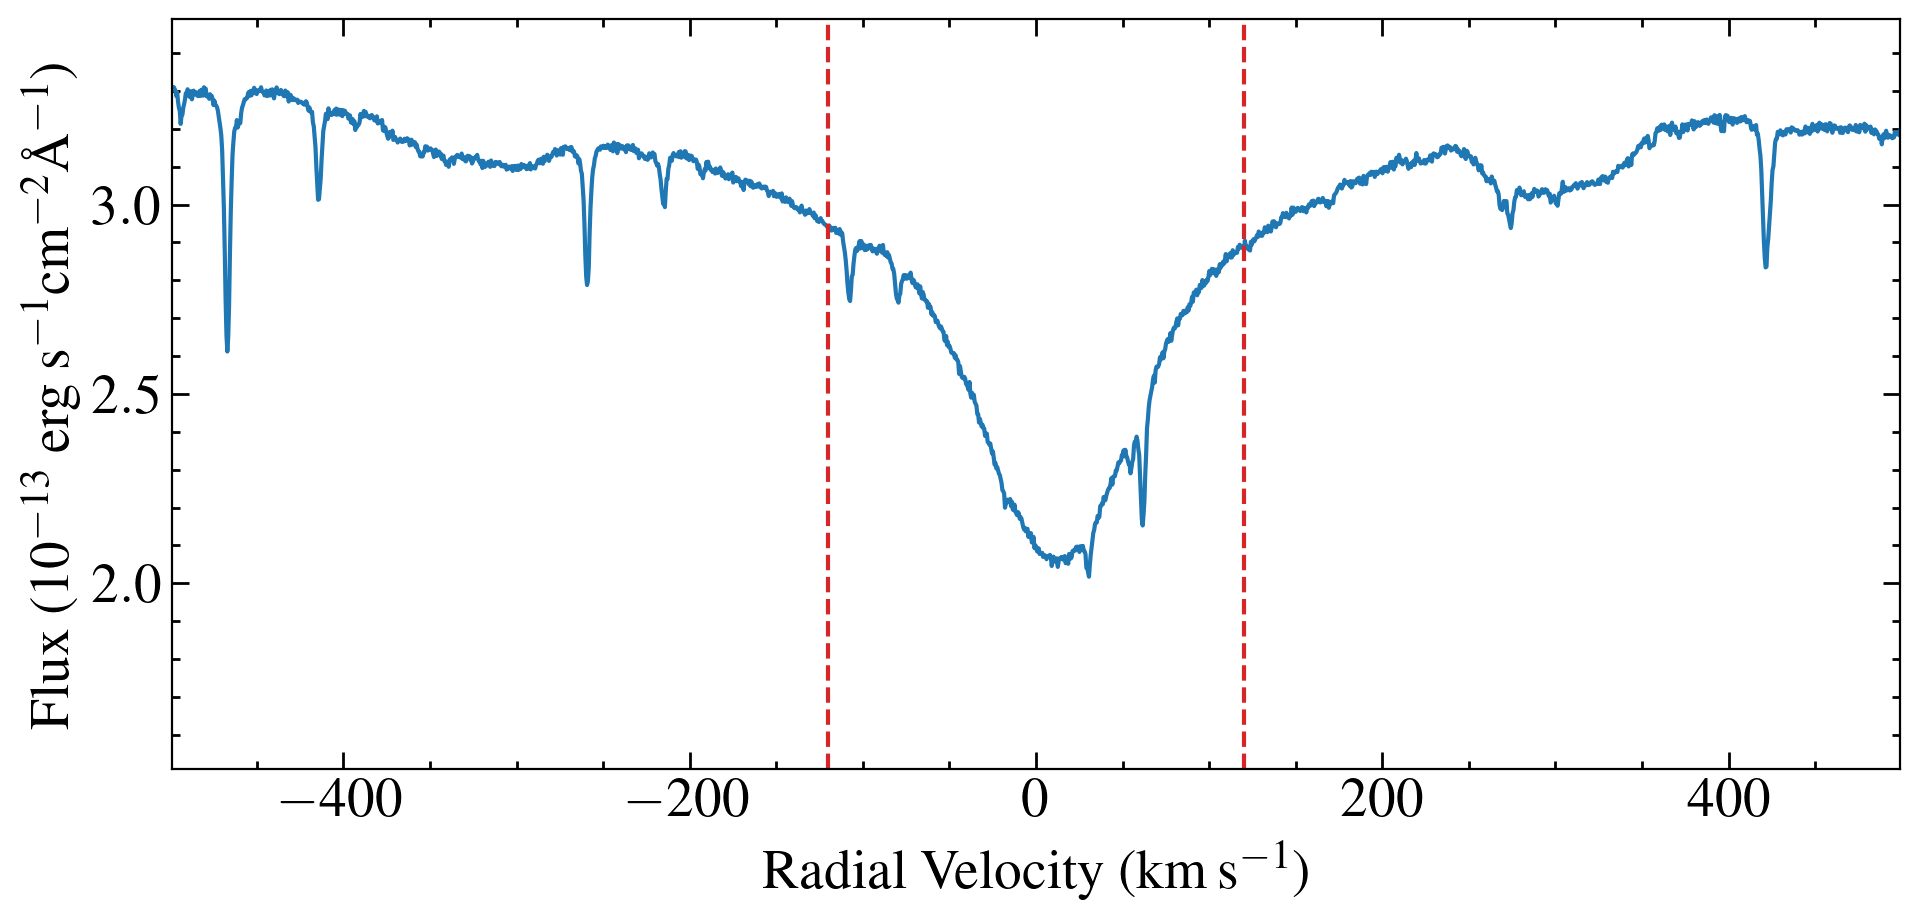

In [15]:
spec = fits.getdata('misc_data/ADP.2021-09-09T08_52_34.303.fits', 1)[0]
# spec.names
w, f, e = spec['WAVE'], spec['FLUX'], spec['ERR'] 

halpha = 6564.61 #air

fig, ax = plt.subplots(figsize=(10, 5))

v = (w*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(halpha*u.AA)).value


ax.plot(v, f*1e13)
# ax.plot(w, f)
ax.set_xlim(-499, 499)
# ax.set_xlim(halpha-10, halpha+10)
ax.set_ylim(1.5e-13, 3.5e-13)
ax.set_ylim(1.51, 3.49)

ax.axvline(vp.to(u.km/u.s).value, ls='--', c='C3')
ax.axvline(-1*vp.to(u.km/u.s).value, ls='--',c='C3')

ax.set_xlabel('Radial Velocity (km\,s$^{-1}$)')

ax.set_ylabel('Flux (10$^{-13}$ erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)')

fig.tight_layout()

(1300.0, 1450.0)

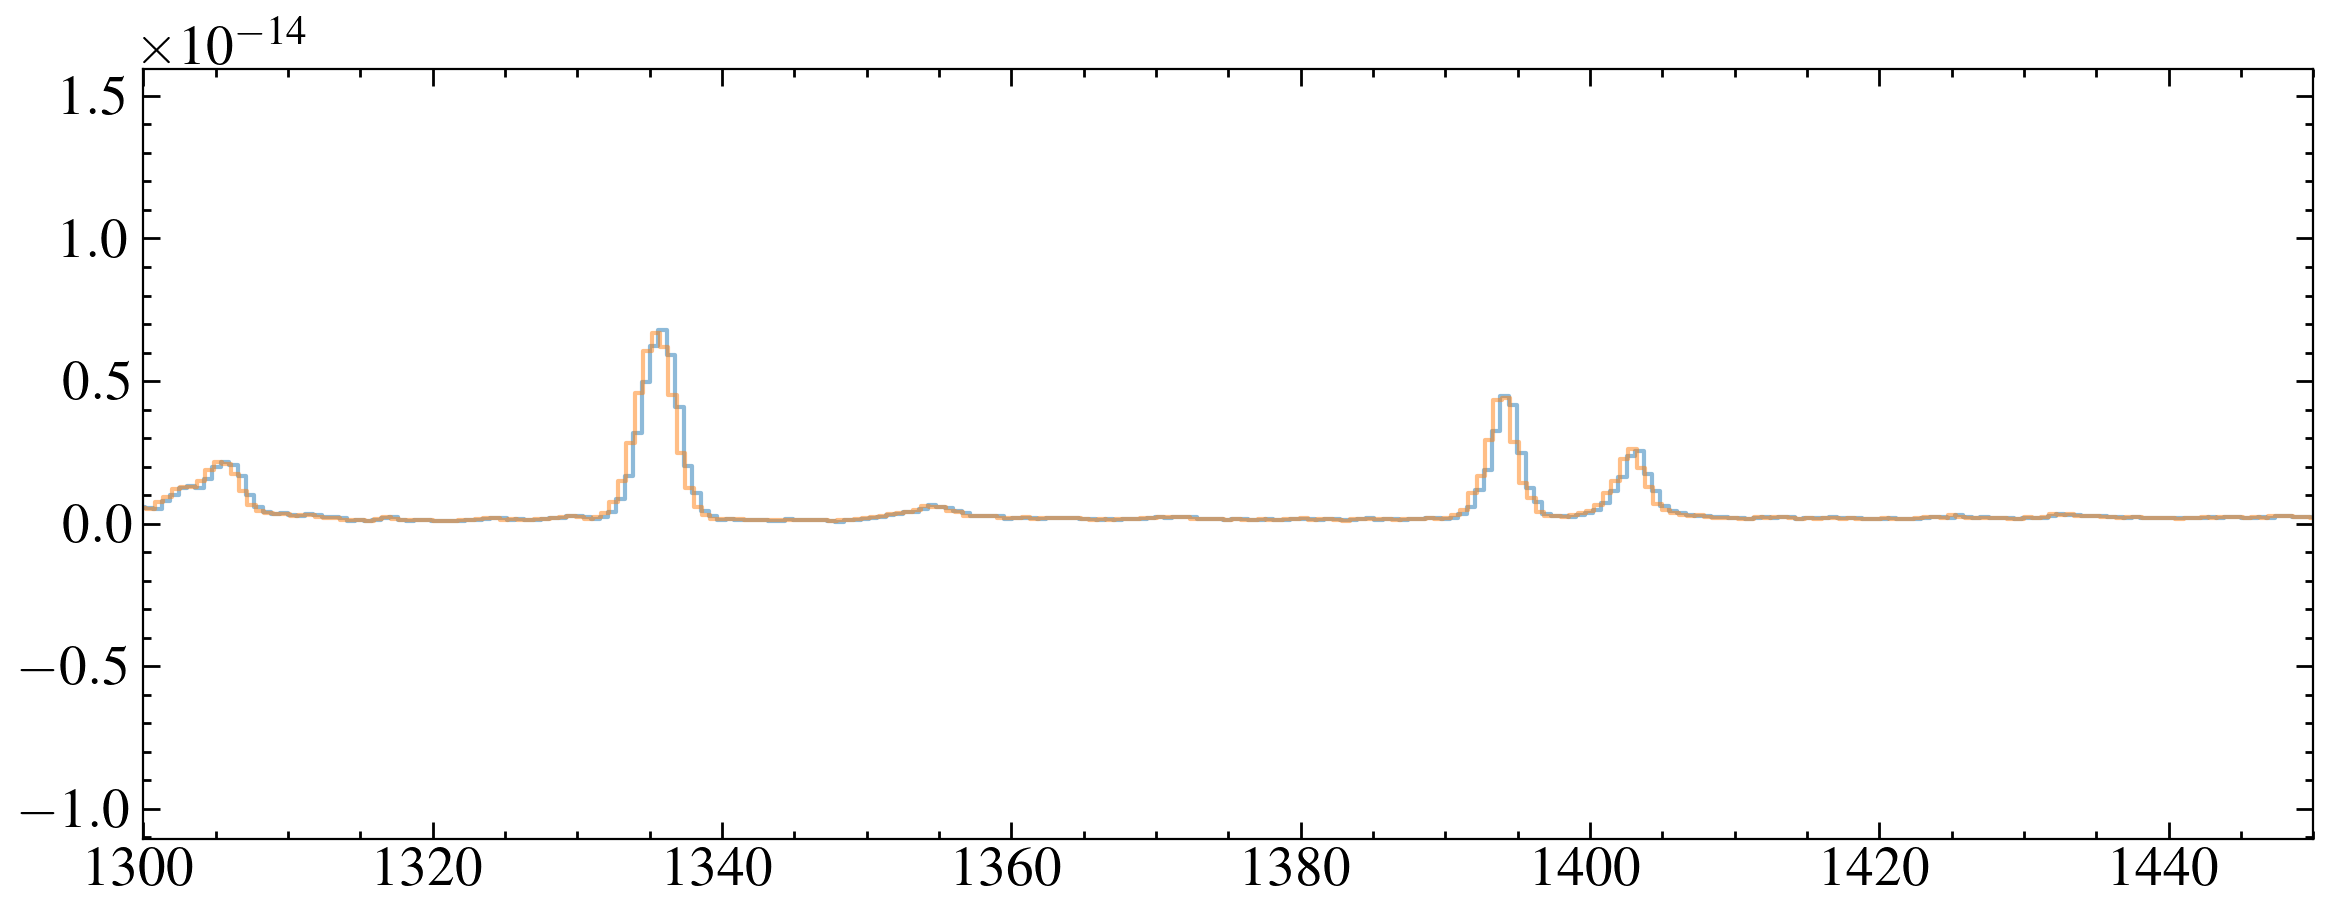

In [16]:
fig, ax = plt.subplots()
cspec = fits.getdata('misc_data/cyndi_specs/hlsp_muscles_hst_stis_hd-120411_g140l_v2_component-spec.fits',1)
hspec = fits.getdata('fixed_hlsp/hd120411/hlsp_muscles_hst_stis_hd-120411_g140l_v25_component-spec.fits',1)

for spec in [cspec, hspec]:
    ax.step(spec['WAVELENGTH'], spec['FLUX'], where='mid', alpha=0.5)

# ax.set_xlim(2750, 2850)
ax.set_xlim(1300, 1450)

testing the somoothing comparison with EK Dra

In [17]:
def guass_smooth(wavelength, flux, A = 'none', R='none', Lambda = 'none'):
    """
    Takes a spectrum and Guassian smooths it either to a angstroms per resel A or an R value. If the wavelength Lambda at which R is evaluated is not supplied it takes the central wavelength of the spectrum.   
    """
    respix = (wavelength[-1] - wavelength[0])/len(wavelength)
    if A == 'none':
        try: 
            R != 'none'
        except:
            print('Error: I need either an Angstroms per resolution element A or a resolution R = Lambda/A')
            return
        if Lambda == 'none':
            Lambda = (wavelength[-1] + wavelength[0])/2 #mid point of spectrum
            print(Lambda)
        A = Lambda / R
        # print(A)
    FWHM = A/respix 
    sigma = FWHM / (2 * np.sqrt(2 * np.log(2)))
    f_smooth = convolve(flux, Gaussian1DKernel(sigma))
    return f_smooth

<>:24: SyntaxWarning: invalid escape sequence '\A'
<>:24: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipykernel_189334/2953529198.py:24: SyntaxWarning: invalid escape sequence '\A'
  ax.set_xlabel('Wavelength (\AA)')


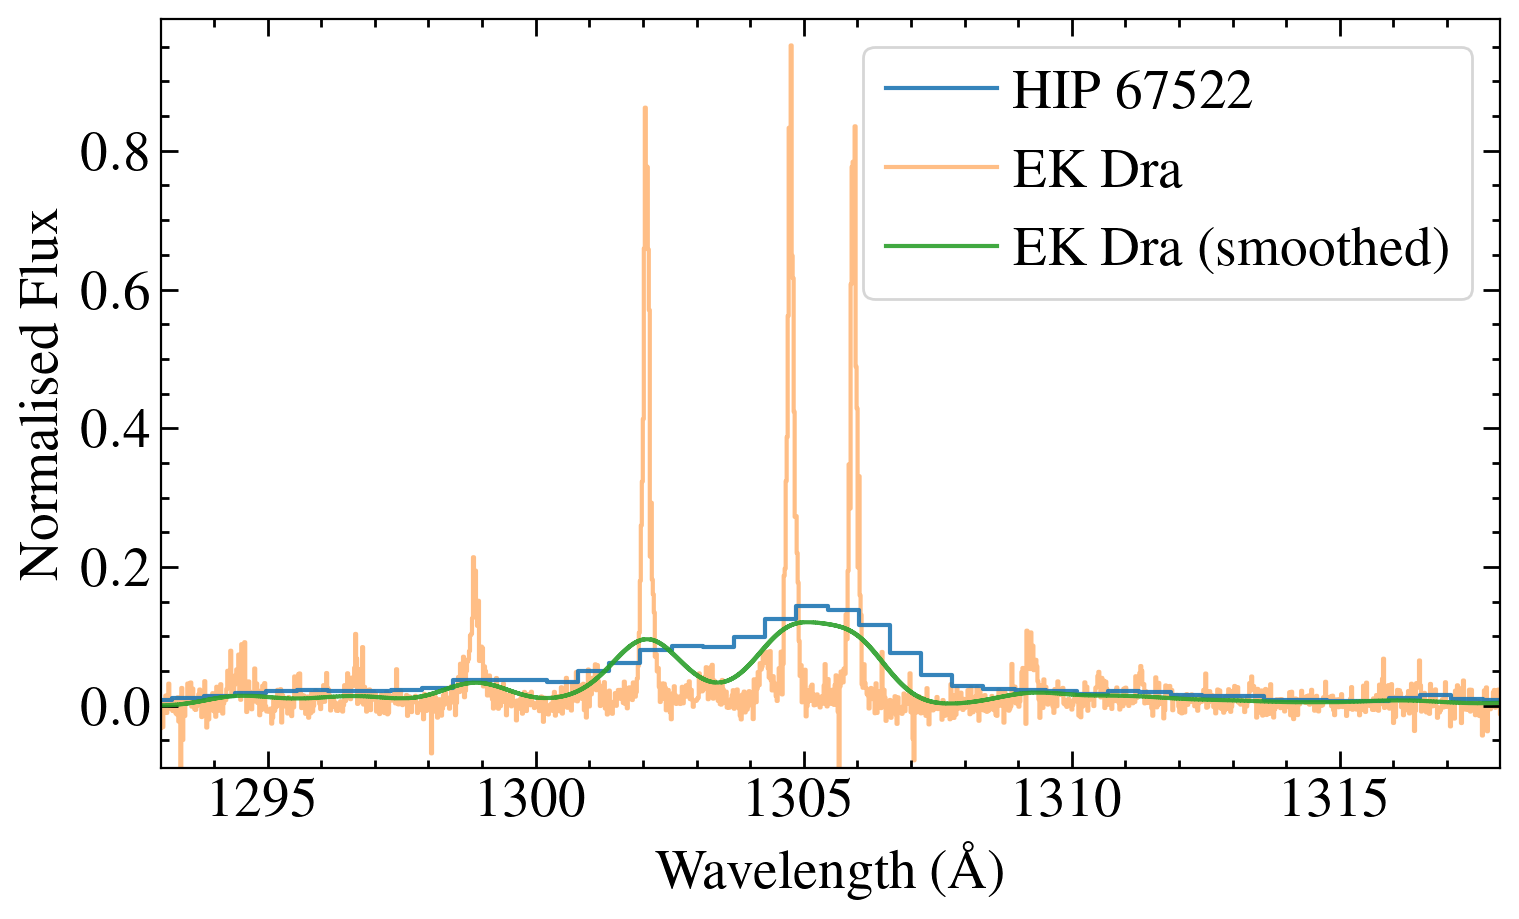

In [18]:
fig, ax = plt.subplots(figsize=(8,5))
espec = fits.getdata('/media/david/2tb_ext_hd/hddata/ek_dra/hst/stis/hst_12566_stis_hd129333_e140m_oboq_cspec.fits',1)[0]
hspec = fits.getdata('fixed_hlsp/hd120411/hlsp_muscles_hst_stis_hd-120411_g140l_v25_component-spec.fits',1)

scales = [1e-13, 1.5e-14]

ax.step(hspec['WAVELENGTH'], hspec['FLUX']/scales[1], where='mid', alpha=0.9, label = 'HIP 67522')
ax.step(espec['WAVELENGTH'], espec['FLUX']/scales[0], where='mid', alpha=0.5, zorder=-5, label = 'EK Dra')


f_smooth = guass_smooth(espec['WAVELENGTH'], espec['FLUX'], A = 'none', R=1000, Lambda = 1425)
ax.step(espec['WAVELENGTH'], f_smooth/scales[0], where='mid', alpha=0.9, label='EK Dra (smoothed)')



# ax.set_xlim(2750, 2850)
# ax.set_xlim(1300, 1450)
# ax.set_xlim(1200.1, 1224.9)
ax.set_xlim(1293.01, 1317.99)
ax.set_ylim(-0.09, 0.99)
ax.legend(frameon=True, loc=1)

ax.set_ylabel('Normalised Flux')
ax.set_xlabel('Wavelength (\AA)')
fig.tight_layout()

In [19]:
g140l = [ 2078.178 ,  2509.171 ,  2509.171 , 2509.199 , 2078.178,  2509.053 ]
g230l=  2103.200 
g430l=  10.000 

print(np.sum(g140l))
print(np.sum(g140l)+g230l)
print(np.sum(g140l)+g230l+g430l)

14192.95
16296.150000000001
16306.150000000001
